In [4]:
import sys
import stmpy
import numpy as np
from numpy import pi
import cancelv3 as cancel
from decimal import *
import matplotlib.pyplot as plt
from sklearn.externals import joblib
import pandas as pd
import scipy.fftpack as fftp
import os
from scipy import signal
import scipy
import time
from matplotlib import colors
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [20]:
figsize(15,6)
t= linspace(0,10,100000)
amp = 1
amp_convert = 1e-9
noise = 1e-3*np.random.random(len(t))
x = amp*np.sin(10*2*pi*t) + 10*np.sin(25*2*pi*t) 
y = amp_convert*(np.copy(x) + amp*0.33333*np.sin(30*2*pi*t + 1*pi) + amp*0.2*np.sin(50*2*pi*t + 0.25*pi))

x_fft = np.fft.fft(x)
y_fft = np.fft.fft(y)

C_1 = (1/(2*pi))

2.094395102393196e-94 6.283185307179587e-94 3.0


(0, 1)

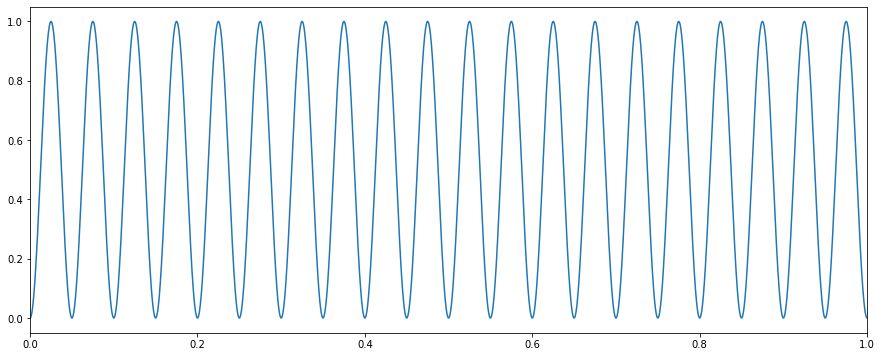

In [56]:
import scipy.integrate as integrate
import scipy.special as special
def samp(tim,arg=1):
    samp_geo = np.sin(10*2*pi*tim) 
    ref = np.sin(10*2*pi*tim)
    return ref*(samp_geo)

def samp2(tim):
    samp_tip = 3*np.sin(10*2*pi*tim)
    ref = np.sin(10*2*pi*tim)
    return ref*samp_tip

locked_geo,err = integrate.quad(samp,0,1e-32)

locked_tip,err = integrate.quad(samp2,0,1e-32)
print(locked_geo/(2*pi),locked_tip/(2*pi),locked_tip/locked_geo)
rel = np.convolve(np.sin(10*2*pi*t),3*np.sin(10*2*pi*t),'same')
tip = 3*np.sin(10*2*pi*t)
geo = np.sin(10*2*pi*t)
ref = np.sin(10*2*pi*t)
tip_fft = np.fft.fft(tip)
geo_fft = np.fft.fft(geo)


convolved_sig = np.fft.ifft(tip_fft/geo_fft)
# semilogy(freqs,tip_fft/geo_fft)
plot(t,ref*geo)
rel_fft = np.fft.fft(rel)/len(rel)
freqs = np.fft.fftfreq(len(t),1/10000)
# plot(freqs,absolute(rel_fft))
xlim(0,1)

(-50, 50)

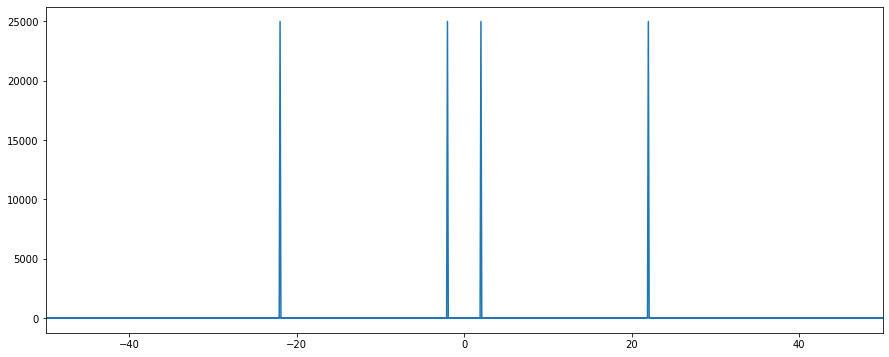

In [96]:
sig = np.sin(-10*2*pi*t)
ref = np.sin(12*2*pi*t)
fft = np.fft.fft(ref*sig)
freqs = np.fft.fftfreq(len(sig),1/10000)
plot(freqs,abs(fft))
# plot(t,ref*sig)
# plot(t,ref)
print()
xlim(-50,50)